In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [22]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [25]:
print(f"Training data shape: {x_train.shape}")
print(f"Training label shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test lable shape: {y_test.shape}")

Training data shape: (60000, 28, 28)
Training label shape: (60000,)
Test data shape: (10000, 28, 28)
Test lable shape: (10000,)


In [4]:
# NORMALIZE THE PIXEL VALUESTO RANGE [0,1]

In [24]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [6]:
print(f"Pixel values after normalization: [{x_train.min()}, {x_test.min()}]")

Pixel values after normalization: [0.0, 0.0]


In [7]:
# DEFINE MODEL ARCHITECTURE:

In [8]:
model = Sequential()

In [9]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\ATHARVA BAGADE\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# COMPILE THE MODEL:

In [12]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9073 - loss: 0.3132 - val_accuracy: 0.9541 - val_loss: 0.1542
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9610 - loss: 0.1313 - val_accuracy: 0.9651 - val_loss: 0.1180
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9720 - loss: 0.0931 - val_accuracy: 0.9638 - val_loss: 0.1192
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9778 - loss: 0.0709 - val_accuracy: 0.9723 - val_loss: 0.0968
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9825 - loss: 0.0574 - val_accuracy: 0.9698 - val_loss: 0.1017
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9860 - loss: 0.0445 - val_accuracy: 0.9748 - val_loss: 0.0915
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9889 - loss: 0.0351 - val_accuracy: 0.9740 - val_loss: 0.0955
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9908 - loss: 0.0294 - 

In [14]:
# EVALUATE MODEL PERFROMANCE:

In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9805 - loss: 0.0865


In [16]:
print(f"Test Loss: {test_loss}")

Test Loss: 0.08648747950792313


In [17]:
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9804999828338623


In [26]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

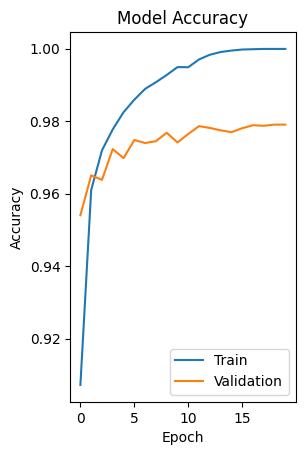

In [31]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

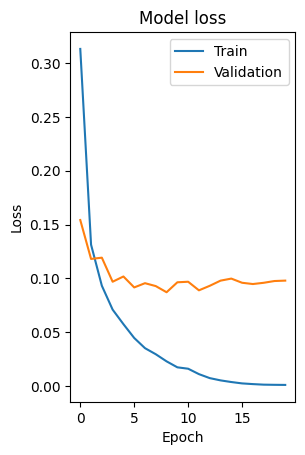

In [33]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()